In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

sns.set_palette('RdBu_r')

In [2]:
fact = pd.read_csv('fact_temp.csv')
fact

,rank,prevRank,peakRank,peakDate,weeksOnChart,streak,streams,trend,entryRank,entryDate,trackName,track_ID,image,releaseDate,artist,artist_ID,week,region,region_ID
0,1,1,1,2024-01-25,7,7,4530846,NO_CHANGE,7,2024-01-11,HOLA PERDIDA,7JKptWv4YXmievid0HajID,https://i.scdn.co/image/ab67616d00001e02546d66...,2024-02-02,Luck Ra,4kcQWQDK0u9AftVSpdrAgk,2024-02-22,Argentina,1
1,2,2,1,2024-01-18,7,7,3912379,NO_CHANGE,2,2024-01-11,Una Foto Remix (feat. Emilia),1kqH58eGh2ZTOHwqBIB2tM,https://i.scdn.co/image/ab67616d00001e02d7e325...,2024-01-05,Mesita,2IKdK6PbitvCiXt1t2bPU6,2024-02-22,Argentina,1
2,3,20,3,2024-02-22,3,3,2958914,MOVED_UP,63,2024-02-08,Gata Only,6XjDF6nds4DE2BBbagZol6,https://i.scdn.co/image/ab67616d00001e021d0777...,2024-02-02,FloyyMenor,7CvTknweLr9feJtRGrpDBy,2024-02-22,Argentina,1
3,4,5,3,2023-12-28,17,17,2776856,MOVED_UP,52,2023-11-02,QUE ME FALTE TODO,1TyBUtMxdmRfXhW3MmbxtQ,https://i.scdn.co/image/ab67616d00001e02546d66...,2024-02-02,Luck Ra,4kcQWQDK0u9AftVSpdrAgk,2024-02-22,Argentina,1
4,5,4,3,2024-01-18,7,7,2667555,MOVED_DOWN,83,2024-01-11,"Young Miko: Bzrp Music Sessions, Vol. 58",6VciS3dRMpZhJiDxT8ArFi,https://i.scdn.co/image/ab67616d00001e027b5840...,2024-01-10,Bizarrap,716NhGYqD1jl2wI1Qkgq36,2024-02-22,Argentina,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476795,196,179,11,2020-11-19,17,17,26352,MOVED_DOWN,24,2020-11-12,The Right Journey (feat. Gducky),2h1KRcol4TvqCl1Lf8RWio,https://i.scdn.co/image/ab67616d00001e02f97a37...,2020-11-08,RAP VIỆT,1cPpd989kghzlZqfpP4KwL,2021-03-04,Vietnam,16
476796,197,-1,151,2021-01-21,7,1,26334,RE_ENTRY,179,2021-01-07,Cưới Đi (feat. ChangC),1CPrkuipLCJH06r0prq4AL,https://i.scdn.co/image/ab67616d00001e0240f0fb...,2020-08-28,2T,5a9t9Ace3c3WLhwlYXsTGH,2021-03-04,Vietnam,16
476797,198,177,1,2020-01-23,49,2,26297,MOVED_DOWN,1,2020-01-23,Black Swan,4TaJlCXAkv1WKYODXmq75b,https://i.scdn.co/image/ab67616d00001e02505190...,2020-02-21,BTS,3Nrfpe0tUJi4K4DXYWgMUX,2021-03-04,Vietnam,16
476798,199,156,93,2021-01-28,6,6,26261,MOVED_DOWN,93,2021-01-28,Chương 2 Của Tương Lai,5sDfLKhaLMbVffAmmnIkXc,https://i.scdn.co/image/ab67616d00001e025ed379...,2021-01-08,WEAN,30eFAXoU2kTjJPf2cq80B8,2021-03-04,Vietnam,16


In [3]:
fact['releaseDate'] = pd.to_datetime(fact['releaseDate'])
fact['peakDate'] = pd.to_datetime(fact['peakDate'])
fact['entryDate'] = pd.to_datetime(fact['entryDate'])
fact['week'] = pd.to_datetime(fact['week'])

In [4]:
fact['week'].min()

Timestamp('2021-03-04 00:00:00')

In [5]:
fact['week'].max()

Timestamp('2024-02-22 00:00:00')

In [4]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476800 entries, 0 to 476799
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   rank          476800 non-null  int64         
 1   prevRank      476800 non-null  int64         
 2   peakRank      476800 non-null  int64         
 3   peakDate      476800 non-null  datetime64[ns]
 4   weeksOnChart  476800 non-null  int64         
 5   streak        476800 non-null  int64         
 6   streams       476800 non-null  int64         
 7   trend         476800 non-null  object        
 8   entryRank     476800 non-null  int64         
 9   entryDate     476800 non-null  datetime64[ns]
 10  trackName     475310 non-null  object        
 11  track_ID      476800 non-null  object        
 12  image         475418 non-null  object        
 13  releaseDate   470979 non-null  datetime64[ns]
 14  artist        475310 non-null  object        
 15  artist_ID     476

In [5]:
fact.isna().sum(axis=0)

rank               0
prevRank           0
peakRank           0
peakDate           0
weeksOnChart       0
streak             0
streams            0
trend              0
entryRank          0
entryDate          0
trackName       1490
track_ID           0
image           1382
releaseDate     5821
artist          1490
artist_ID          0
week               0
region             0
region_ID          0
dtype: int64

In [6]:
pd.Series(fact.artist.str.strip().unique()).sort_values()

125      #TocoParaVos
2034             $NOT
4816        $ilkMoney
2063      $uicideboy$
2986            &TEAM
            ...      
3867          高爾宣 OSN
4133    魏嘉瑩 Arrow Wei
4180              魚丁糸
4001              黄霄雲
389               NaN
Length: 5146, dtype: object

In [6]:
fact.sort_values('releaseDate').iloc[208]

rank                                                           88
prevRank                                                       37
peakRank                                                       29
peakDate                                      2023-04-06 00:00:00
weeksOnChart                                                  111
streak                                                         47
streams                                                   1427348
trend                                                  MOVED_DOWN
entryRank                                                     194
entryDate                                     2021-03-11 00:00:00
trackName                                                     NaN
track_ID                                   1t8J4CgyQvJPDWwX3uaElF
image           https://i.scdn.co/image/ab67616d00001e02711a14...
releaseDate                                   1934-05-19 00:00:00
artist                                                        NaN
artist_ID 

In [7]:
fact['releaseDate'] = fact['releaseDate'].replace('1900-01-01', np.nan)

In [8]:
fact['releaseDate'].sort_values()

164487   1934-05-19
437063   1944-01-01
436868   1944-01-01
437488   1944-01-01
437789   1944-01-01
            ...    
476433          NaT
476528          NaT
476637          NaT
476717          NaT
476793          NaT
Name: releaseDate, Length: 476800, dtype: datetime64[ns]

In [9]:
fact[fact['streams'] == fact['streams'].max()]

,rank,prevRank,peakRank,peakDate,weeksOnChart,streak,streams,trend,entryRank,entryDate,trackName,track_ID,image,releaseDate,artist,artist_ID,week,region,region_ID
136000,1,1,1,2023-01-19,2,2,115156896,NO_CHANGE,1,2023-01-19,Flowers,0yLdNVWF3Srea0uzk55zFn,https://i.scdn.co/image/ab67616d00001e02cd2220...,2023-08-18,Miley Cyrus,5YGY8feqx7naU7z4HrwZM6,2023-01-26,Global,5


Overall Spotify Streams

In [6]:
df_songs = fact.copy()

df_songs = df_songs.loc[(df_songs['region'] != 'Global')]
df_songs['year'] = df_songs['week'].dt.year
df_songs['month'] = df_songs['week'].dt.month
df_songs['top10'] = df_songs['rank'] <= 10

df_songs.head()

,rank,prevRank,peakRank,peakDate,weeksOnChart,streak,streams,trend,entryRank,entryDate,...,image,releaseDate,artist,artist_ID,week,region,region_ID,year,month,top10
0,1,1,1,2024-01-25,7,7,4530846,NO_CHANGE,7,2024-01-11,...,https://i.scdn.co/image/ab67616d00001e02546d66...,2024-02-02,Luck Ra,4kcQWQDK0u9AftVSpdrAgk,2024-02-22,Argentina,1,2024,2,True
1,2,2,1,2024-01-18,7,7,3912379,NO_CHANGE,2,2024-01-11,...,https://i.scdn.co/image/ab67616d00001e02d7e325...,2024-01-05,Mesita,2IKdK6PbitvCiXt1t2bPU6,2024-02-22,Argentina,1,2024,2,True
2,3,20,3,2024-02-22,3,3,2958914,MOVED_UP,63,2024-02-08,...,https://i.scdn.co/image/ab67616d00001e021d0777...,2024-02-02,FloyyMenor,7CvTknweLr9feJtRGrpDBy,2024-02-22,Argentina,1,2024,2,True
3,4,5,3,2023-12-28,17,17,2776856,MOVED_UP,52,2023-11-02,...,https://i.scdn.co/image/ab67616d00001e02546d66...,2024-02-02,Luck Ra,4kcQWQDK0u9AftVSpdrAgk,2024-02-22,Argentina,1,2024,2,True
4,5,4,3,2024-01-18,7,7,2667555,MOVED_DOWN,83,2024-01-11,...,https://i.scdn.co/image/ab67616d00001e027b5840...,2024-01-10,Bizarrap,716NhGYqD1jl2wI1Qkgq36,2024-02-22,Argentina,1,2024,2,True


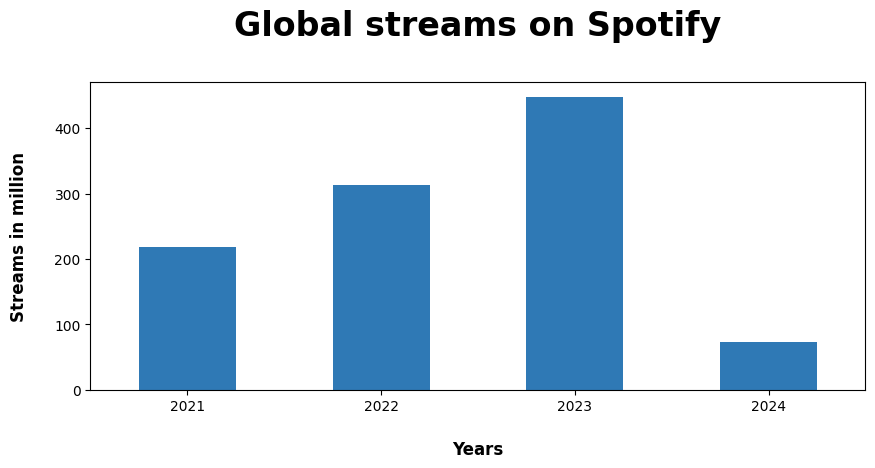

In [10]:
total_streams_dev = df_songs.groupby('year')['streams'].sum()
total_streams_dev = np.round(total_streams_dev / 1000000 / 365, 2)

plt.figure(figsize=(10,4))
total_streams_dev.plot(kind='bar')

plt.title('Global streams on Spotify\n',  fontsize=24, fontweight='bold')
plt.ylabel('Streams in million\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nYears',  fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

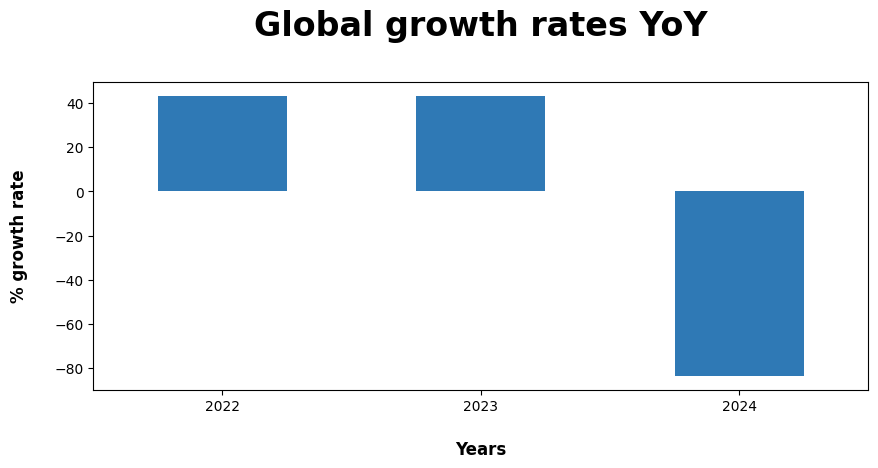

In [11]:
global_stream_growt_rates = np.round(((total_streams_dev[1:] / total_streams_dev.shift(1)[1:]) - 1) * 100, 1)

plt.figure(figsize=(10,4))
global_stream_growt_rates.plot(kind='bar')

plt.title('Global growth rates YoY\n',  fontsize=24, fontweight='bold')
plt.ylabel('% growth rate\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nYears',  fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

Most relevant regions

In [16]:
rel_markets = df_songs.pivot_table(index='region', columns='year', values='streams', aggfunc=np.sum)
rel_markets.sort_values(by=2023, ascending=False, inplace=True)
rel_markets

C:\Users\marti.MARTIN\AppData\Local\Temp\ipykernel_13356\1531517338.py:1: FutureWarning: The provided callable <function sum at 0x0000015E76A5E660> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  rel_markets = df_songs.pivot_table(index='region', columns='year', values='streams', aggfunc=np.sum)


year,2021,2022,2023,2024
region,,,,
USA,2.316907e+10,2.839314e+10,3.461537e+10,5.602018e+09
Mexico,1.050934e+10,1.720200e+10,2.624517e+10,4.492970e+09
Brazil,1.403608e+10,1.659276e+10,2.251426e+10,3.463866e+09
India,4.867236e+09,1.111093e+10,1.866035e+10,2.721111e+09
Indonesia,4.452066e+09,7.923041e+09,1.585806e+10,2.531080e+09
Philippines,3.794136e+09,5.906101e+09,9.549370e+09,1.866544e+09
Turkey,3.921165e+09,7.026828e+09,9.287511e+09,1.429584e+09
Argentina,4.516914e+09,6.238698e+09,8.392522e+09,1.351411e+09
France,5.089786e+09,6.114629e+09,6.750048e+09,1.144454e+09


In [17]:
market_shares = np.round((rel_markets / rel_markets.sum(axis=0)) * 100, 1)
market_shares

year,2021,2022,2023,2024
region,,,,
USA,29.1,24.9,21.2,20.9
Mexico,13.2,15.1,16.0,16.8
Brazil,17.6,14.5,13.8,12.9
India,6.1,9.7,11.4,10.2
Indonesia,5.6,6.9,9.7,9.5
Philippines,4.8,5.2,5.8,7.0
Turkey,4.9,6.2,5.7,5.3
Argentina,5.7,5.5,5.1,5.0
France,6.4,5.4,4.1,4.3


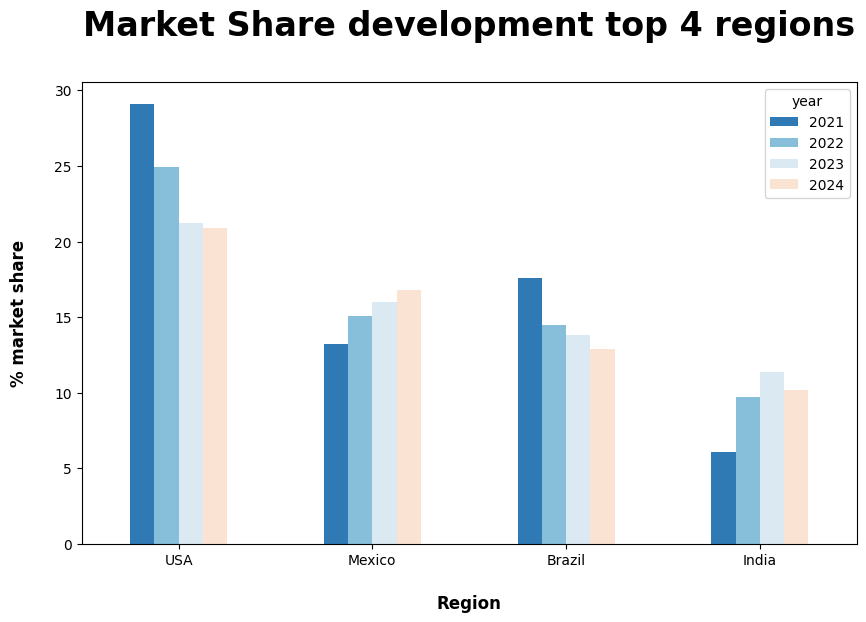

In [18]:
market_shares.head(4).plot(kind='bar', figsize=(10,6))

plt.title('Market Share development top 4 regions\n',  fontsize=24, fontweight='bold')
plt.ylabel('% market share\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nRegion', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

In [19]:
stream_growth_region = np.round(((rel_markets.iloc[:, 1:] / rel_markets.shift(periods=1, axis=1).iloc[:, 1:]) - 1) * 100, 0)
stream_growth_region

year,2022,2023,2024
region,,,
USA,23.0,22.0,-84.0
Mexico,64.0,53.0,-83.0
Brazil,18.0,36.0,-85.0
India,128.0,68.0,-85.0
Indonesia,78.0,100.0,-84.0
Philippines,56.0,62.0,-80.0
Turkey,79.0,32.0,-85.0
Argentina,38.0,35.0,-84.0
France,20.0,10.0,-83.0


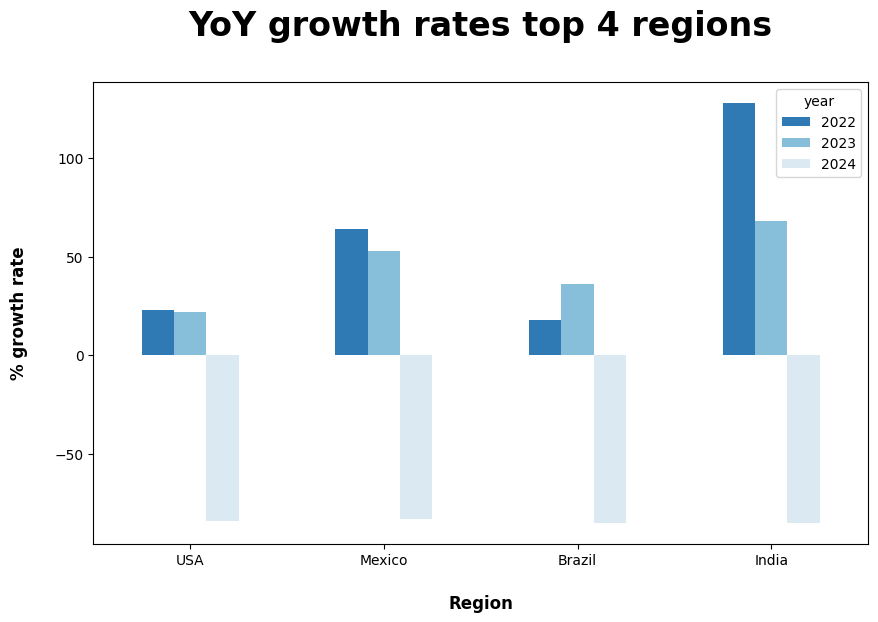

In [20]:
stream_growth_region.head(4).plot(kind='bar', figsize=(10,6))

plt.title('YoY growth rates top 4 regions\n',  fontsize=24, fontweight='bold')
plt.ylabel('% growth rate\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nRegion', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

In [23]:
regions = market_shares.index.to_list() 
data = stream_growth_region.loc[regions] # grow rates

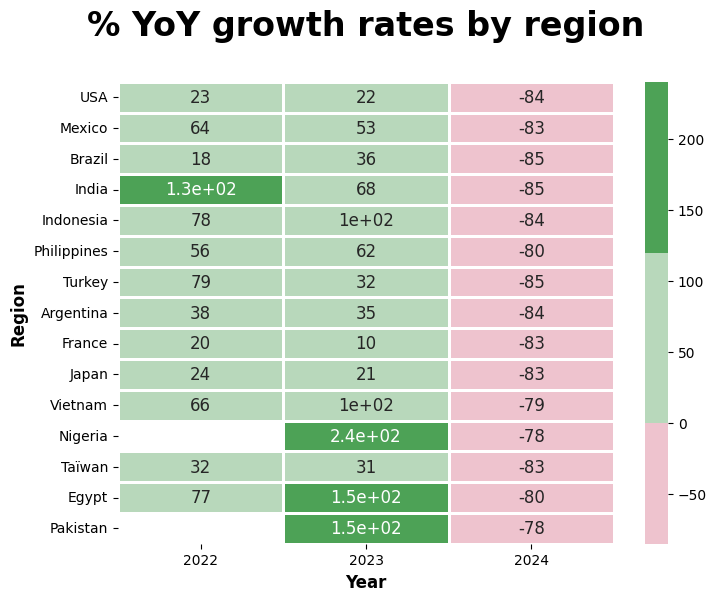

In [24]:
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(h_neg=0, h_pos=130, s=70, l=60, n=4)

sns.heatmap(data=data, center=0, annot=True, cmap=cmap, linewidths=2, annot_kws={"size":12})

plt.title('% YoY growth rates by region\n', fontsize=24, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')

plt.show()

Artist Analysis

In [25]:
df_artist = df_songs.copy()
df_artist.head()

,rank,prevRank,peakRank,peakDate,weeksOnChart,streak,streams,trend,entryRank,entryDate,...,image,releaseDate,artist,artist_ID,week,region,region_ID,year,month,top10
0,1,1,1,2024-01-25,7,7,4530846,NO_CHANGE,7,2024-01-11,...,https://i.scdn.co/image/ab67616d00001e02546d66...,2024-02-02,Luck Ra,4kcQWQDK0u9AftVSpdrAgk,2024-02-22,Argentina,1,2024,2,True
1,2,2,1,2024-01-18,7,7,3912379,NO_CHANGE,2,2024-01-11,...,https://i.scdn.co/image/ab67616d00001e02d7e325...,2024-01-05,Mesita,2IKdK6PbitvCiXt1t2bPU6,2024-02-22,Argentina,1,2024,2,True
2,3,20,3,2024-02-22,3,3,2958914,MOVED_UP,63,2024-02-08,...,https://i.scdn.co/image/ab67616d00001e021d0777...,2024-02-02,FloyyMenor,7CvTknweLr9feJtRGrpDBy,2024-02-22,Argentina,1,2024,2,True
3,4,5,3,2023-12-28,17,17,2776856,MOVED_UP,52,2023-11-02,...,https://i.scdn.co/image/ab67616d00001e02546d66...,2024-02-02,Luck Ra,4kcQWQDK0u9AftVSpdrAgk,2024-02-22,Argentina,1,2024,2,True
4,5,4,3,2024-01-18,7,7,2667555,MOVED_DOWN,83,2024-01-11,...,https://i.scdn.co/image/ab67616d00001e027b5840...,2024-01-10,Bizarrap,716NhGYqD1jl2wI1Qkgq36,2024-02-22,Argentina,1,2024,2,True


In [33]:
complete_regions = df_artist['region'].unique().tolist()
complete_regions

['Argentina',
 'Brazil',
 'Egypt',
 'France',
 'India',
 'Indonesia',
 'Japan',
 'Mexico',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Taïwan',
 'Turkey',
 'USA',
 'Vietnam']

In [75]:
def calc_kpis(df, agg):
    df_temp = df.groupby(agg, as_index=False).agg(total_streams_mio=('streams', 'sum'),
                                count_songs=('trackName', 'nunique'),
                                weeks_in_charts=('rank', 'count'),
                                weeks_in_top10=('top10', 'sum'),
                                #top10_share=('top10', 'mean')
                                )

    df_temp['total_streams_mio'] = np.round(df_temp['total_streams_mio'] / 1000000, 2)
    df_temp['avg_streams_per_song_mio'] = np.round (df_temp['total_streams_mio'] / df_temp['count_songs'], 1)
    df_temp['avg_weeks_in_charts_per_song'] = np.round (df_temp['weeks_in_charts'] / (df_temp['count_songs'] * len(complete_regions)), 1)
    #df_temp['top10_share'] = np.round(100 * df_temp['top10_share'], 2)
    
    df_temp.sort_values(by='total_streams_mio', inplace=True, ascending=False)

    df_temp.reset_index(drop=True, inplace=True)

    return df_temp

In [43]:
def bar_plot(data, avg, kpi, dim):

    kpi_str = kpi.replace('_', ' ').capitalize()
    dim_str = dim.replace('_', ' ').capitalize()

    plt.figure(figsize=(10,6))

    sns.barplot(data=data, x=kpi, y=dim, palette='Blues_r')
    plt.axvline(avg, lw=1, ls='--', c='r')

    plt.title(f'Ranking of {kpi_str} by {dim_str}\n',  fontsize=24, fontweight='bold')
    plt.ylabel(f'{dim_str}\n',  fontsize=12, fontweight='bold')
    plt.xlabel(f'\n{kpi_str}', fontsize=12, fontweight='bold')

    plt.text(x=avg * 1.05, y=10, s=f'The avg is\n{np.round(avg, 0)}', 
         fontsize=14, 
         fontweight='bold', 
         c='r')

    plt.show()

In [76]:
artist_performance_overall = calc_kpis(df_artist, 'artist')

artist_performance_overall.head(10)

,artist,total_streams_mio,count_songs,weeks_in_charts,weeks_in_top10,avg_streams_per_song_mio,avg_weeks_in_charts_per_song
0,Bad Bunny,9734.12,73,4991,443,133.3,4.6
1,Taylor Swift,7605.69,159,5510,221,47.8,2.3
2,The Weeknd,4528.32,40,5090,74,113.2,8.5
3,Olivia Rodrigo,4203.06,25,3325,206,168.1,8.9
4,Drake,4049.99,89,1637,109,45.5,1.2
5,Peso Pluma,3716.62,31,1119,99,119.9,2.4
6,Morgan Wallen,3488.64,47,1149,45,74.2,1.6
7,Pritam,3181.95,66,2886,156,48.2,2.9
8,Doja Cat,3024.15,25,2639,108,121.0,7.0
9,Harry Styles,2812.03,18,2258,111,156.2,8.4


C:\Users\marti.MARTIN\AppData\Local\Temp\ipykernel_13356\3103870791.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=kpi, y=dim, palette='Blues_r')


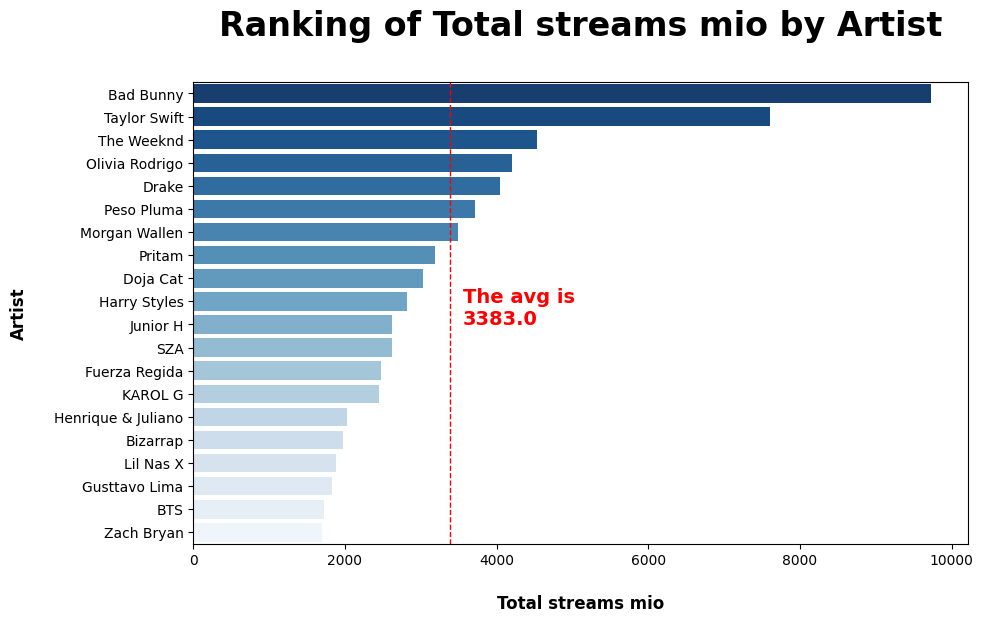

In [77]:
data = artist_performance_overall.head(20)
avg = artist_performance_overall.head(20)['total_streams_mio'].mean()

bar_plot(data, avg, 'total_streams_mio', 'artist')

plt.show()

In [78]:
top_artist = artist_performance_overall['artist'].iloc[0]
top_artist

'Bad Bunny'

most successful songs of best artist

In [79]:
top_artist_songs = df_artist[df_artist['artist'] == top_artist]
top_artists_song_performance = calc_kpis(top_artist_songs, 'trackName')

top_artists_song_performance.head()

,trackName,total_streams_mio,count_songs,weeks_in_charts,weeks_in_top10,avg_streams_per_song_mio,avg_weeks_in_charts_per_song
0,Me Porto Bonito,874.65,1,251,81,874.6,16.7
1,Tití Me Preguntó,690.37,1,190,69,690.4,12.7
2,Efecto,620.67,1,215,40,620.7,14.3
3,Ojitos Lindos,619.95,1,213,49,620.0,14.2
4,Yonaguni,542.45,1,256,53,542.4,17.1


C:\Users\marti.MARTIN\AppData\Local\Temp\ipykernel_13356\3103870791.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=kpi, y=dim, palette='Blues_r')


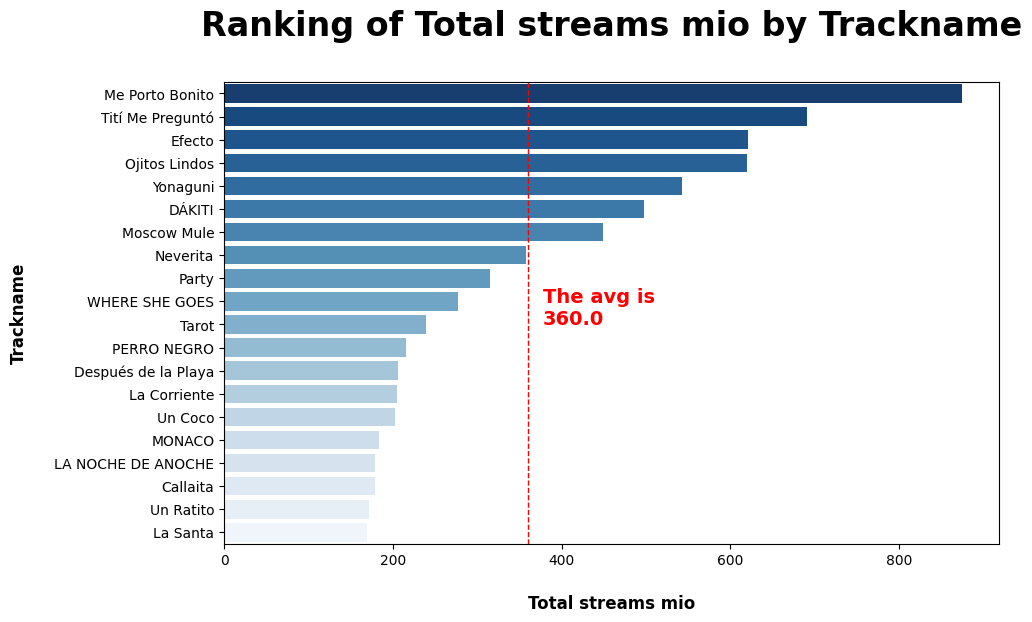

In [80]:
data = top_artists_song_performance.head(20)
avg = top_artists_song_performance.head(20)['total_streams_mio'].mean()

bar_plot(data, avg, 'total_streams_mio', 'trackName')

plt.show()

annual development of best artist

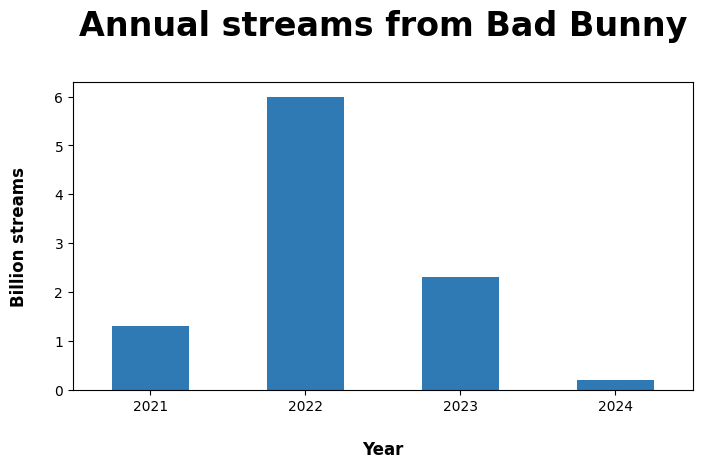

In [81]:
plt.figure(figsize=(8,4))

np.round (top_artist_songs.groupby('year')['streams'].sum() / 1000000000, 1).plot(kind='bar')

plt.title(f'Annual streams from {top_artist}\n',  fontsize=24, fontweight='bold')
plt.ylabel('Billion streams\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nYear', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

In [82]:
top_artists_year_performance = calc_kpis(top_artist_songs, 'year')

top_artists_year_performance.sort_values('year')

,year,total_streams_mio,count_songs,weeks_in_charts,weeks_in_top10,avg_streams_per_song_mio,avg_weeks_in_charts_per_song
2,2021,1255.97,22,956,85,57.1,2.9
0,2022,5965.26,50,2758,328,119.3,3.7
1,2023,2348.92,50,1190,30,47.0,1.6
3,2024,163.97,9,87,0,18.2,0.6


region performance of best artist

In [83]:
artists_region_performance = df_artist.groupby(['region', 'artist'], as_index=False)['streams'].sum()
artists_region_performance['streams'] = np.round (artists_region_performance['streams'] / 1000000, 1)

artists_region_performance['artist_rank'] = artists_region_performance.groupby(['region'])['streams'].rank(method='dense', ascending=False)
artists_region_performance['artist_rank'] = artists_region_performance['artist_rank'].astype(np.int16)

artists_region_performance.head()

,region,artist,streams,artist_rank
0,Argentina,#TocoParaVos,3.5,229
1,Argentina,24kGoldn,1.5,247
2,Argentina,ACRAZE,3.5,229
3,Argentina,AURORA,2.4,239
4,Argentina,Abel Pintos,5.5,215


In [84]:
top_artist_region_performance = artists_region_performance[artists_region_performance['artist'] == top_artist].sort_values(by='streams', ascending=False)
top_artist_region_performance['stream_share'] = np.round (100 * top_artist_region_performance['streams'] / top_artist_region_performance['streams'].sum(), 1)
top_artist_region_performance['stream_share_running'] = top_artist_region_performance['stream_share'].cumsum()

top_artist_region_performance

,region,artist,streams,artist_rank,stream_share,stream_share_running
3647,Mexico,Bad Bunny,6200.8,1,63.7,63.7
6583,USA,Bad Bunny,2582.8,5,26.5,90.2
34,Argentina,Bad Bunny,917.8,1,9.4,99.6
1537,France,Bad Bunny,32.6,128,0.3,99.9
5391,Taïwan,Bad Bunny,0.1,151,0.0,99.9


Song Analysis:
most successful song

In [85]:
top_artist_best_song = top_artists_song_performance['trackName'][0]
top_artist_best_song

'Me Porto Bonito'

In [86]:
song_performance_overall = calc_kpis(df_songs, 'trackName')

top20_songs = song_performance_overall.head(20)
top20_songs

,trackName,total_streams_mio,count_songs,weeks_in_charts,weeks_in_top10,avg_streams_per_song_mio,avg_weeks_in_charts_per_song
0,As It Was,1532.26,1,1085,97,1532.3,72.3
1,STAY (with Justin Bieber),1277.06,1,1192,219,1277.1,79.5
2,Heat Waves,1038.13,1,885,67,1038.1,59.0
3,Kill Bill,913.53,1,490,88,913.5,32.7
4,Me Porto Bonito,874.65,1,251,81,874.6,16.7
5,INDUSTRY BABY (feat. Jack Harlow),801.21,1,721,78,801.2,48.1
6,Cruel Summer,796.67,1,481,59,796.7,32.1
7,Die For You,770.69,1,712,13,770.7,47.5
8,Blinding Lights,755.96,1,1004,1,756.0,66.9
9,Ella Baila Sola,752.07,1,130,40,752.1,8.7


In [87]:
artist_performance_overall[artist_performance_overall['artist'] == 'Harry Styles']

,artist,total_streams_mio,count_songs,weeks_in_charts,weeks_in_top10,avg_streams_per_song_mio,avg_weeks_in_charts_per_song
9,Harry Styles,2812.03,18,2258,111,156.2,8.4


C:\Users\marti.MARTIN\AppData\Local\Temp\ipykernel_13356\3103870791.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=kpi, y=dim, palette='Blues_r')


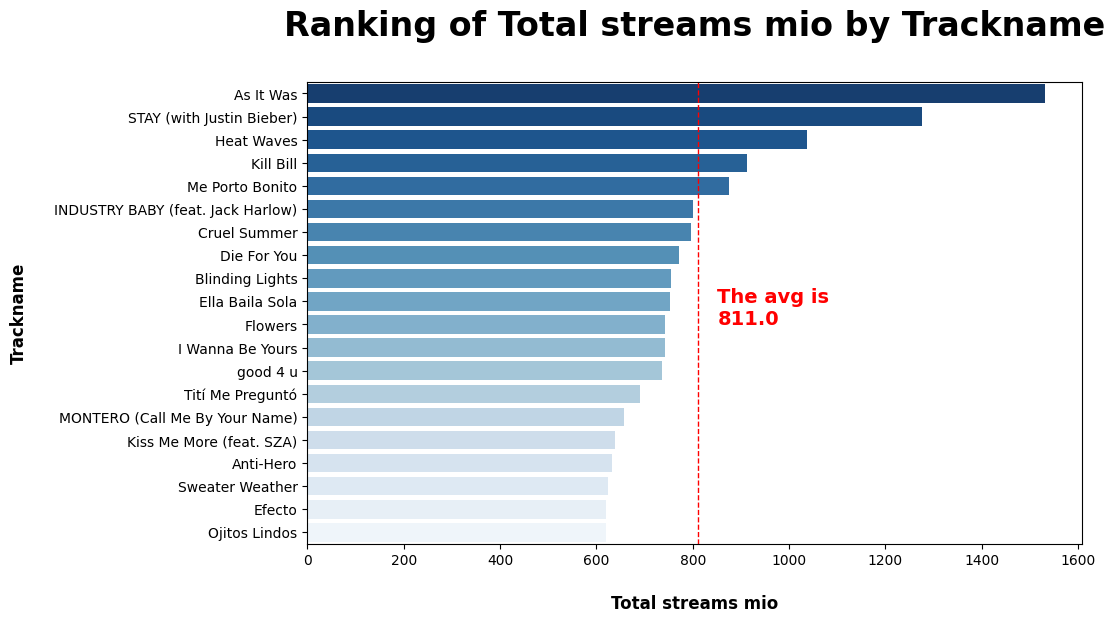

In [89]:
data = top20_songs.sort_values(by='total_streams_mio', ascending=False)
avg = top20_songs['total_streams_mio'].mean()

bar_plot(data, avg, 'total_streams_mio', 'trackName')

In [91]:
best_song = top20_songs['trackName'][0]
best_song

'As It Was'

avg rank by region of best song

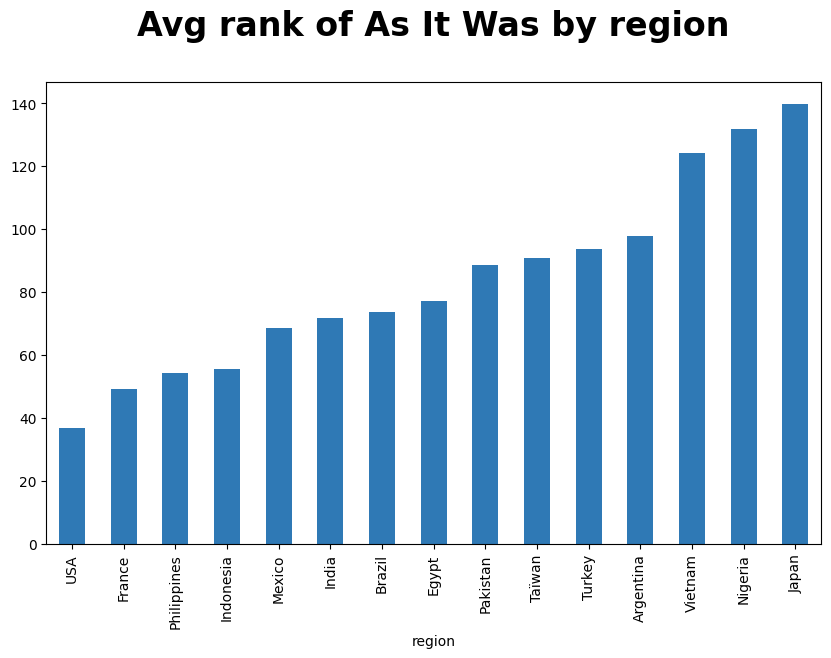

In [92]:
best_song_region = df_artist[df_artist['trackName'] == best_song].groupby('region')['rank'].mean().sort_values()

plt.figure(figsize=(10,6))

best_song_region.plot(kind='bar')
plt.title(f'Avg rank of {best_song} by region\n', fontsize=24, fontweight='bold')

plt.show()

In [93]:
best_song_country = best_song_region.index[0]
best_song_country

'USA'

In [94]:
f'{best_song} is performing best in {best_song_country} with an avg rank of {np.round(best_song_region[0], 1)}.'

C:\Users\marti.MARTIN\AppData\Local\Temp\ipykernel_13356\1632619127.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{best_song} is performing best in {best_song_country} with an avg rank of {np.round(best_song_region[0], 1)}.'


'As It Was is performing best in USA with an avg rank of 36.8.'

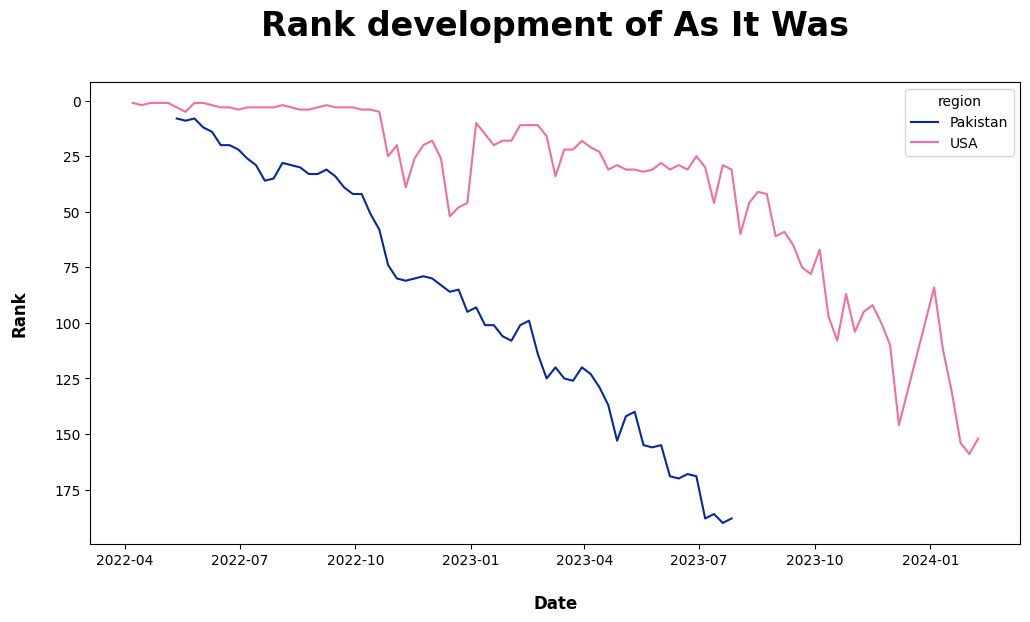

In [97]:
countries = [best_song_country, 'Pakistan']

data = df_songs[(df_songs['trackName'] == best_song) & (df_songs['region'].isin(countries))]

plt.figure(figsize=(12,6))

sns.lineplot(data=data, x='week', y='rank', hue='region', palette=['#05299E', '#F26CA7'])

plt.title(f'Rank development of {best_song}\n',  fontsize=24, fontweight='bold')
plt.ylabel('Rank\n',  fontsize=12, fontweight='bold')
plt.xlabel(f'\nDate', fontsize=12, fontweight='bold')

plt.gca().invert_yaxis()

plt.show()

In [99]:
# duration "As it was" stayed in the charts in USA (in weeks) 

data[data['region'] == best_song_country]['week'].nunique()

94

In [100]:
print(f'The ranking timeseries of {best_song} confirms the oustanding avg rank in {countries[0]}.\nThe development shows most of the time the ranking in {countries[0]} is above {countries[1]}.') 

The ranking timeseries of As It Was confirms the oustanding avg rank in USA.
The development shows most of the time the ranking in USA is above Pakistan.
